In [107]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Gambar Asli

290 290


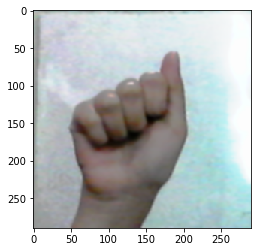

In [94]:
img = Image.open("1.png")
gbr = np.array(img)
M,N = img.size
b = np.zeros((M,N,3))
print(M,N)
plt.imshow(gbr);

# Contras

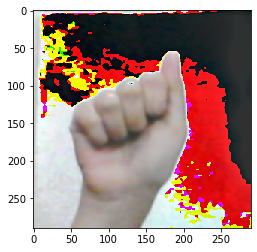

In [108]:
for i in range (M):
    for j in range (N):
        for k in range(3):
            gbr[i][j][k] = gbr[i][j][k]+50

plt.imshow(gbr);

# Grayscale

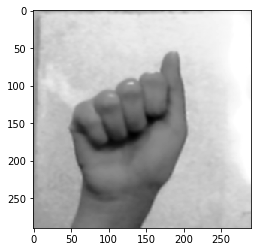

In [99]:
def rgb2gray(gambar):
    gray = np.zeros((M,N))
    for i in range (M):
        for j in range(N):
            gray[i,j]= (0.2989*gambar[i,j,0])+(0.5870*gambar[i,j,1])+(0.1140*gambar[i,j,2])
    return gray

baru = np.array(img)
baru = rgb2gray(baru)

plt.imshow(baru, cmap="gray");

# High pass

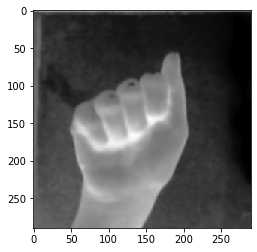

In [65]:
ker = np.array([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
])

has = np.zeros((M,N))
atas = np.pad(baru, ([1,1],[1,1]), mode="constant")

for i in range (M):
    for j in range(N):
        has[i][j] = atas[i-1,j-1]*ker[0,0] + atas[i-1, j]*ker[0,1] + atas[i-1,j+1]*ker[0,2]
        has[i][j] = has[i][j] + atas[i,j-1]*ker[0,0] + atas[i, j]*ker[0,1] + atas[i,j+1]*ker[0,2]
        has[i][j] = has[i][j] + atas[i+1,j-1]*ker[0,0] + atas[i+1, j]*ker[0,1] + atas[i+1,j+1]*ker[0,2]
plt.imshow(has, cmap="gray");

# Low pass

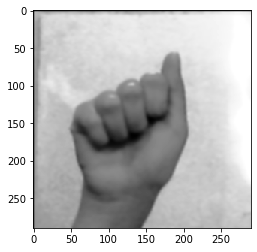

In [83]:
ker = np.array([
    [1/16,1/8,1/16],
    [1/8,1/4,1/8],
    [1/16,1/8,1/16]
])

hasi = np.zeros((M,N))

for i in range (M):
    for j in range(N):
        hasi[i][j] = atas[i-1,j-1]*ker[0,0] + atas[i-1, j]*ker[0,1] + atas[i-1,j+1]*ker[0,2]
        hasi[i][j] = hasi[i][j] + atas[i,j-1]*ker[1,0] + atas[i, j]*ker[1,1] + atas[i,j+1]*ker[1,2]
        hasi[i][j] = hasi[i][j] + atas[i+1,j-1]*ker[2,0] + atas[i+1, j]*ker[2,1] + atas[i+1,j+1]*ker[2,2]
plt.imshow(hasi, cmap="gray");

# koreksi Gamma

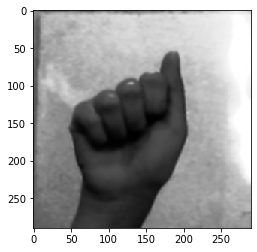

In [106]:
bar= baru
for i in range (M):
    for j in range (N):
        bar[i,j] = pow (bar[i,j],1/0.8)
plt.imshow(bar, cmap="gray");